In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown as md


In [2]:
np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [3]:
df = pd.read_csv('./data/2 OUTPUT Songs with lyrics.csv')
df

,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyrics
0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,#9 Dream Lyrics[Verse 1]\nSo long ago\nWas it ...
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,4,2002-10-26,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,"['Jay-Z', 'Beyonce Knowles']",hip hop,"’03 Bonnie & Clyde Lyrics[Intro: JAY-Z]\nUhh, ..."
2,'65 Love AffairPaul Davis,6,1982-02-27,'65 Love Affair,Paul Davis,['Paul Davis'],rock,’65 Love Affair LyricsI was a car hop\nYou wer...
3,('til) I Kissed YouThe Everly Brothers,4,1959-08-15,('til) I Kissed You,The Everly Brothers,['The Everly Brothers'],pop,(’Til) I Kissed You Lyrics[Verse]\nNever felt ...
4,(Can't Live Without Your) Love And AffectionNe...,1,1990-07-07,(Can't Live Without Your) Love And Affection,Nelson,['Nelson'],latin,(Can’t Live Without Your) Love And Affection L...
...,...,...,...,...,...,...,...,...
5002,everything i wantedBillie Eilish,8,2019-11-23,everything i wanted,Billie Eilish,['Billie Eilish'],country,TranslationsTürkçeBillie Eilish - everything i...
5003,iSpyKYLE Featuring Lil Yachty,4,2017-01-14,iSpy,KYLE Featuring Lil Yachty,"['KYLE', 'Lil Yachty']",rock,"I Spy, T Shirt, Isn’t She Lovely, & Swang Mash..."
5004,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,['J. Cole'],uncategorized,"Interlude (Cole World) LyricsI'm drivin', nigg..."
5005,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","['J. Cole', '21 Savage', 'Morray']",uncategorized,TranslationsРусскийPortuguêsDeutschItaliano​​m...


In [4]:
df[df.song.str.contains('Rolling in the Deep', case=False)].lyrics.iloc[0]

"TranslationsFrançaisEspañolPortuguêsΕλληνικάRolling in the Deep Lyrics[Verse 1]\nThere's a fire starting in my heart\nReaching a fever pitch and it's bringing me out the dark\nFinally, I can see you crystal clear\nGo ahead and sell me out and I'll lay your shit bare\nSee how I'll leave with every piece of you\nDon't underestimate the things that I will do\nThere's a fire starting in my heart\nReaching a fever pitch, and it's bringing me out the dark\n\n[Pre-Chorus]\nThe scars of your love remind me of us\nThey keep me thinkin' that we almost had it all\nThe scars of your love, they leave me breathless\nI can't help feeling\n\n[Chorus]\nWe could've had it all (You're gonna wish you never had met me)\nRolling in the deep (Tears are gonna fall, rolling in the deep)\nYou had my heart inside of your hand (You're gonna wish you never had met me)\nAnd you played it to the beat (Tears are gonna fall, rolling in the deep)\n\n[Verse 2]\nBaby, I have no story to be told\nBut I've heard one on yo

# Explode data into *one row per line*

In [5]:
lyrics_split_df = df.copy()
lyrics_split_df['Parsed Lyrics'] = df.lyrics.apply(lambda l: l.split('\n'))

every_row_is_a_line_RAW = lyrics_split_df.explode('Parsed Lyrics').drop_duplicates(
    subset=['Parsed Lyrics', 'song_id']
).drop(
    columns=['lyrics']
).rename(columns={'Parsed Lyrics': 'lyric_line'}).reset_index()


In [6]:
every_row_is_a_line_RAW

,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyric_line
0,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,#9 Dream Lyrics[Verse 1]
1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,So long ago
2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,"Was it in a dream, was it just a dream?"
3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,"I know, yes I know"
4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,"Seemed so very real, it seemed so real to me"
...,...,...,...,...,...,...,...,...,...
321594,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,"I'm addicted to promethazine, it's crazy, yeah..."
321595,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,"All this money coming in, it drive me crazy no..."
321596,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,I'll be crazy if I blow it
321597,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,And it left so many R.I.P.


### Filter & clean

In [7]:
# SONG_DASH_ARTIST = '[A-Z].+\s\-\s[A-Z].+'  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"
SONG_DASH_ARTIST = ' - '  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"

# regex is easiest
ENDS_WITH_YEAR_IN_PAREN = '\(\d{4}?\)$'  # eg "... (2018)"


with_filters = every_row_is_a_line_RAW[
    ~every_row_is_a_line_RAW['lyric_line'].str.contains(
        ENDS_WITH_YEAR_IN_PAREN, 
        regex= True, case=False, na=False
    )
]

with_filters = with_filters[
    ~with_filters['lyric_line'].str.contains(
        SONG_DASH_ARTIST
    )
]


# remove if starts *or* ends with "[]": ~20k
# NOTE: I checked this fairly thoroughly, this condition signals a non-lyric
with_filters = with_filters[
        ~with_filters.lyric_line.str.startswith('[') &
        ~with_filters.lyric_line.str.endswith(']')
]


# all we need, not too many verses in these songs :P 
with_filters = with_filters[
        ~with_filters.lyric_line.str.contains('Verse 1') &
        ~with_filters.lyric_line.str.contains('Verse 2') &
        ~with_filters.lyric_line.str.contains('Verse 3') &
        ~with_filters.lyric_line.str.contains('Verse One') &
        ~with_filters.lyric_line.str.contains('Verse Two') &
        ~with_filters.lyric_line.str.contains('Verse Three')
]

In [8]:
with_more_filters = with_filters[
    ~with_filters.lyric_line.str.contains('" by ') &
    ~with_filters.lyric_line.str.contains('EmbedShare URLCopyEmbedCopy')
].reset_index()

In [9]:
MIN_CHAR_COUNT_FOR_A_LINE = 6

In [10]:
md(f'### note: we are just going to look at lyric lines of {MIN_CHAR_COUNT_FOR_A_LINE}+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)')

### note: we are just going to look at lyric lines of 6+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)

In [11]:
with_even_more_filters = with_more_filters[
    (with_more_filters.lyric_line.str.len() >= MIN_CHAR_COUNT_FOR_A_LINE)
]

# Dealing with non-lyrics returned from the API. For the prototype: just filter them out via *character length*. Long term TODO: replace them with the correct lyrics.


In [12]:
# Reasonable?
with_even_more_filters['lyric_line'].str.len().describe()

count    258010.000000
mean         85.805666
std         293.392146
min           6.000000
25%          26.000000
50%          37.000000
75%          54.000000
max       28919.000000
Name: lyric_line, dtype: float64

In [13]:
# For context:
len("We could've had it all (tears are gonna fall, rolling in the deep)")

66

<AxesSubplot:>

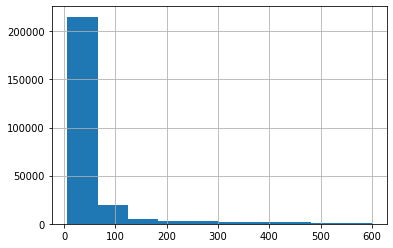

In [14]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() < 600
].lyric_line.str.len().hist()

### Inspecting unusually long lyrics, they seem to be non-lyrics pretty consistently

In [15]:
LYRIC_LENGTH_CUTOFF = 380

In [16]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() > LYRIC_LENGTH_CUTOFF
]#.lyric_line.str.len().describe()

,level_0,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyric_line
354,396,10,(Hot S**t) Country GrammarNelly,7,2000-04-29,(Hot S**t) Country Grammar,Nelly,['Nelly'],pop,Rap is a victorious genre. Having built its hi...
1234,1510,42,(You're) Having My BabyPaul Anka with Odia Coates,1,1974-07-06,(You're) Having My Baby,Paul Anka with Odia Coates,['Paul Anka with Odia Coates'],uncategorized,"It created a cacophony of hacking coughs, bron..."
1235,1511,42,(You're) Having My BabyPaul Anka with Odia Coates,1,1974-07-06,(You're) Having My Baby,Paul Anka with Odia Coates,['Paul Anka with Odia Coates'],uncategorized,From October to April the walls of Limerick gl...
1241,1517,42,(You're) Having My BabyPaul Anka with Odia Coates,1,1974-07-06,(You're) Having My Baby,Paul Anka with Odia Coates,['Paul Anka with Odia Coates'],uncategorized,"When I was a child I would look at my father, ..."
1243,1519,42,(You're) Having My BabyPaul Anka with Odia Coates,1,1974-07-06,(You're) Having My Baby,Paul Anka with Odia Coates,['Paul Anka with Odia Coates'],uncategorized,After wandering and drinking in America and En...
...,...,...,...,...,...,...,...,...,...,...
261485,313902,4878,You Are So Beautiful/It's A Sin When You Love ...,5,1975-01-11,You Are So Beautiful/It's A Sin When You Love ...,Joe Cocker,['Joe Cocker'],hip hop,"I finish, flush and go outside. She takes my h..."
261486,313903,4878,You Are So Beautiful/It's A Sin When You Love ...,5,1975-01-11,You Are So Beautiful/It's A Sin When You Love ...,Joe Cocker,['Joe Cocker'],hip hop,Frieda tells the priest I had a bit of a dizzi...
261487,313904,4878,You Are So Beautiful/It's A Sin When You Love ...,5,1975-01-11,You Are So Beautiful/It's A Sin When You Love ...,Joe Cocker,['Joe Cocker'],hip hop,The First Officer and the Wireless Officer ret...
264415,317424,4957,You're Makin' Me High/Let It FlowToni Braxton,1,1996-06-08,You're Makin' Me High/Let It Flow,Toni Braxton,['Toni Braxton'],hip hop,After an unfortunate dip in mainstream appeal ...


<AxesSubplot:>

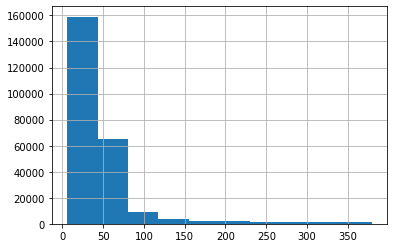

In [17]:
with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() < LYRIC_LENGTH_CUTOFF
].lyric_line.str.len().hist()

## Ok, so just filter out long lines

In [18]:
songs_that_contain_suspiciously_long_lyric_lines = with_even_more_filters[
    with_even_more_filters['lyric_line'].str.len() > LYRIC_LENGTH_CUTOFF
].song_id.unique()

In [19]:
with_long_lyrics_removed = with_even_more_filters[
    with_even_more_filters.song_id.apply(lambda song_id: song_id not in songs_that_contain_suspiciously_long_lyric_lines)
]
with_long_lyrics_removed

,level_0,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyric_line
0,1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,So long ago
1,2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,"Was it in a dream, was it just a dream?"
2,3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,"I know, yes I know"
3,4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,"Seemed so very real, it seemed so real to me"
5,6,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,Took a walk down the street
...,...,...,...,...,...,...,...,...,...,...
266014,321594,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,"I'm addicted to promethazine, it's crazy, yeah..."
266015,321595,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,"All this money coming in, it drive me crazy no..."
266016,321596,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,I'll be crazy if I blow it
266017,321597,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,And it left so many R.I.P.


### (so we don't have to re-name stuff as we do updates)

In [20]:
filtering_done = with_long_lyrics_removed

# Add a numeric date column (for fast filtering), eg `1974-01-01` becomes something like `1974.0`

In [21]:
date_column_cast_to_datetime = pd.to_datetime(filtering_done['chart_debut'])
date_column_cast_to_datetime

0        1974-12-21
1        1974-12-21
2        1974-12-21
3        1974-12-21
5        1974-12-21
            ...    
266014   2021-05-29
266015   2021-05-29
266016   2021-05-29
266017   2021-05-29
266018   2021-05-29
Name: chart_debut, Length: 192481, dtype: datetime64[ns]

In [22]:
day_as_a_percentage = pd.to_numeric(date_column_cast_to_datetime.dt.dayofyear) / 366 # for leap years. it's ok to be a little sloppy


In [23]:
year_int = pd.to_datetime(filtering_done['chart_debut']).dt.strftime('%Y').astype(int)
year_int

0         1974
1         1974
2         1974
3         1974
5         1974
          ... 
266014    2021
266015    2021
266016    2021
266017    2021
266018    2021
Name: chart_debut, Length: 192481, dtype: int64

In [24]:
date_col_done = filtering_done.copy()
date_col_done['chart_debut_date_as_a_decimal'] = round(year_int + day_as_a_percentage, 2)
date_col_done

,level_0,index,song_id,chart_position,chart_debut,song,performer,artist_array,generic_genre,lyric_line,chart_debut_date_as_a_decimal
0,1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,So long ago,1974.97
1,2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,"Was it in a dream, was it just a dream?",1974.97
2,3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,"I know, yes I know",1974.97
3,4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,"Seemed so very real, it seemed so real to me",1974.97
5,6,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,['John Lennon'],rock,Took a walk down the street,1974.97
...,...,...,...,...,...,...,...,...,...,...,...
266014,321594,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,"I'm addicted to promethazine, it's crazy, yeah...",2021.41
266015,321595,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,"All this money coming in, it drive me crazy no...",2021.41
266016,321596,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,I'll be crazy if I blow it,2021.41
266017,321597,5006,pride.is.the.devilJ. Cole & Lil Baby,7,2021-05-29,pride.is.the.devil,J. Cole & Lil Baby,"['J. Cole', 'Lil Baby']",uncategorized,And it left so many R.I.P.,2021.41


# NOTE: I'm dropping any row with *any* MISSING DATA 
Maybe we try something less aggressive later (eg blank genre is ok)

In [25]:
COLUMNS_FOR_VIZ = ['performer', 'song', 'generic_genre', 'lyric_line', 'chart_debut', 'chart_debut_date_as_a_decimal']

lyric_lines_ready_for_analysis = (
    date_col_done[
        COLUMNS_FOR_VIZ
    ]
    .replace('', np.nan)
    .dropna()
    .reset_index(drop=True)
)

lyric_lines_ready_for_analysis['lyric_line'] = lyric_lines_ready_for_analysis['lyric_line'].apply(
    lambda val: val.replace('â\x80\x99', "'")
).apply(
    lambda val: val.replace('Embed', "") # i checked, this works
).apply( # 2 songs using 'embed' LOL so this is necessary 
    lambda val:  val.replace('embed', "") if val.endswith('embed') else val
)


lyric_lines_ready_for_analysis

,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal
0,John Lennon,#9 Dream,rock,So long ago,1974-12-21,1974.97
1,John Lennon,#9 Dream,rock,"Was it in a dream, was it just a dream?",1974-12-21,1974.97
2,John Lennon,#9 Dream,rock,"I know, yes I know",1974-12-21,1974.97
3,John Lennon,#9 Dream,rock,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97
4,John Lennon,#9 Dream,rock,Took a walk down the street,1974-12-21,1974.97
...,...,...,...,...,...,...
192476,J. Cole & Lil Baby,pride.is.the.devil,uncategorized,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41
192477,J. Cole & Lil Baby,pride.is.the.devil,uncategorized,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41
192478,J. Cole & Lil Baby,pride.is.the.devil,uncategorized,I'll be crazy if I blow it,2021-05-29,2021.41
192479,J. Cole & Lil Baby,pride.is.the.devil,uncategorized,And it left so many R.I.P.,2021-05-29,2021.41


### Lyric lines by year (sanity check)

In [26]:
lyric_lines_ready_for_analysis

,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal
0,John Lennon,#9 Dream,rock,So long ago,1974-12-21,1974.97
1,John Lennon,#9 Dream,rock,"Was it in a dream, was it just a dream?",1974-12-21,1974.97
2,John Lennon,#9 Dream,rock,"I know, yes I know",1974-12-21,1974.97
3,John Lennon,#9 Dream,rock,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97
4,John Lennon,#9 Dream,rock,Took a walk down the street,1974-12-21,1974.97
...,...,...,...,...,...,...
192476,J. Cole & Lil Baby,pride.is.the.devil,uncategorized,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41
192477,J. Cole & Lil Baby,pride.is.the.devil,uncategorized,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41
192478,J. Cole & Lil Baby,pride.is.the.devil,uncategorized,I'll be crazy if I blow it,2021-05-29,2021.41
192479,J. Cole & Lil Baby,pride.is.the.devil,uncategorized,And it left so many R.I.P.,2021-05-29,2021.41


<AxesSubplot:>

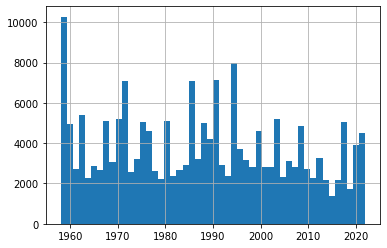

In [27]:
lyric_lines_ready_for_analysis.chart_debut.apply(lambda d: int(d[:4])).hist(bins=50)

In [28]:
num_unique_songs_left_after_filters = len(lyric_lines_ready_for_analysis[['performer', 'song']].drop_duplicates())

md(f'## After all temporary filers, we have lyrics from {num_unique_songs_left_after_filters}/5,000 original songs')


## After all temporary filers, we have lyrics from 4860/5,000 original songs

In [29]:
lyric_lines_ready_for_analysis.to_csv('./data/3 OUTPUT One lyric lines per row, cleaned.csv', index=False)